<a href="https://colab.research.google.com/github/bloomfieldfong/Stadistical-Learning/blob/main/ProyectoSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Prediccion del Titanic
Michelle Bloomfield
Carné: 22000345



Import de librerias

In [3]:
import pandas as pd
import numpy as np
import imageio as imio
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import tensorflow as tf
from google.colab import drive
import tensorboard
%reload_ext tensorboard
tensorboard.__version__
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

Instructions for updating:
non-resource variables are not supported in the long term
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import de data de 

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Proyecto Stadistical Learnign/data_titanic_proyecto.csv')

# **Analisis Exploratorio**

Limpieza de datos nulos

In [4]:
data.isna().sum()

PassengerId             0
Name                    0
Age                   177
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 687
Embarked                2
passenger_class         0
passenger_sex           0
passenger_survived      0
dtype: int64

Podemos notas que el 77% de datos para la columna "Cabin"  estan en null por lo cual no se recomienda hacer alguna imputacion estadistica. Embarked y Age si se estara realizando transformaciones estadisticas para completar estos datos.

In [5]:
#Edad media de todos los pasajeros
media_edad = data['Age'].median()
print(media_edad)
#Media de edad por la clase de pasajero y sexo,
##Se tomo en cuenta estas dos variables por que se considera de que una persona mas joven probablemente no pueda comprar una clase mas alta
##Tambien se tomo en cuenta el sexo de los pasajeros ya que se realizo varias agrupaciones y pude notar que si cambia el promedio de edad entre
##mujeres y hombres por clase 
media_edad = data.groupby(['passenger_class', 'passenger_sex']).median()['Age']
#Moda de si estan embarcados o no 
moda_cabin = data['Embarked'].mode()
print(media_edad)
print(moda_cabin[0])

28.0
passenger_class  passenger_sex
Lower            F                21.5
                 M                25.0
Middle           F                28.0
                 M                30.0
Upper            F                35.0
                 M                40.0
Name: Age, dtype: float64
S


Reemplazo de Edad y Embarked en el dataset

In [6]:
data['Embarked'] = data['Embarked'].fillna(moda_cabin[0])
data['Embarked'].isna().sum()

0

In [7]:
sex = ['F', 'M']
pclass = ['Lower', 'Middle', 'Upper']
for iclass in pclass:
  for isex in sex:
    condition = (data['passenger_class'] == iclass) & (data['passenger_sex'] == isex)
    data['Age'][condition] = data['Age'][condition].fillna(media_edad[iclass][isex])

data['Age'].isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0

Transformación de Variables Categoricas

In [8]:
data.head()


,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N


In [8]:
data["Embarked"] = data["Embarked"].replace({"Q" : 0, "C" : 1, "S": 2})
data["passenger_class"] = data["passenger_class"].replace({"Upper" : 1, "Middle" : 2, "Lower" : 3}).astype('int32')
data["passenger_sex"] = data["passenger_sex"].replace({"M" : 1, "F" : 0}).astype('int32')
data["passenger_survived"] = data["passenger_survived"].replace({"Y" : 1, "N" : 0}).astype('int32')
data = data.drop('Cabin', axis=1)

Se realizo una transformacion a las variables: Embarked, passanger_call, passanger_sex, passanger_survived a variables numericas para poder 

In [10]:
data.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,3,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,1,0,1
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,2,3,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,1,0,1
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,2,3,1,0


In [11]:
data.isna().sum()

PassengerId           0
Name                  0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Embarked              0
passenger_class       0
passenger_sex         0
passenger_survived    0
dtype: int64

Se establecio un correlativo para cada una de las columnas de nuestro data frame



*   PassangerID
* Name
*   Age
* SibSP
* Parch
* Ticket
* Fare
* Cabin
* Embarked
* Passenger_class 	
* Passenger_sex 	
* Passenger_survived

Passanger_survived sera nuestra variable y en este proyecto por lo cual se estara realiznaod un analisis de correlacion en base a esta variable.




In [12]:
data.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,3,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,1,0,1
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,2,3,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,1,0,1
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,2,3,1,0


In [13]:
data.describe(include= 'all')

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
count,891.000000,891,891.000000,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,891,NaN,NaN,NaN,681,NaN,NaN,NaN,NaN,NaN
top,NaN,"Braund, Mr. Owen Harris",NaN,NaN,NaN,347082,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
mean,446.000000,NaN,29.112424,0.523008,0.381594,NaN,32.204208,1.638608,2.308642,0.647587,0.383838
std,257.353842,NaN,13.304424,1.102743,0.806057,NaN,49.693429,0.635673,0.836071,0.477990,0.486592
min,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,NaN,21.500000,0.000000,0.000000,NaN,7.910400,1.000000,2.000000,0.000000,0.000000
50%,446.000000,NaN,26.000000,0.000000,0.000000,NaN,14.454200,2.000000,3.000000,1.000000,0.000000
75%,668.500000,NaN,36.000000,1.000000,0.000000,NaN,31.000000,2.000000,3.000000,1.000000,1.000000


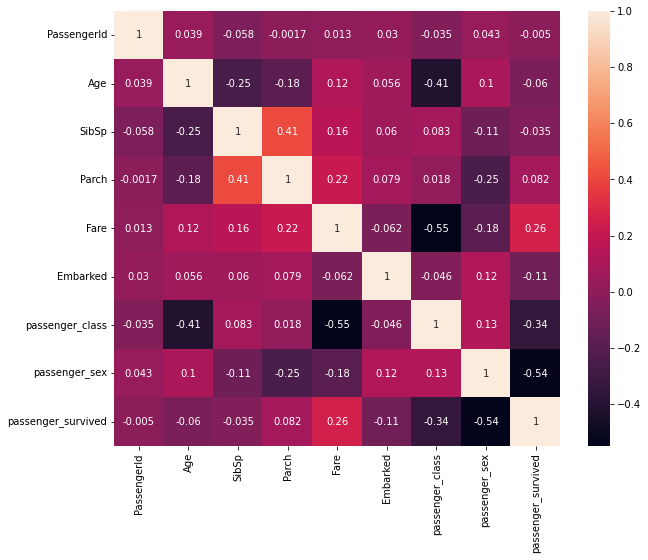

In [8]:
correlation_table = data.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_table, annot=True)
plt.show()

Separacion de data de entremaiento, prueba y validación.

In [9]:
##Separacion de la data en 80% y 20%   
##Datos de entranimiento y de prueba
train, test = train_test_split(data, test_size=0.2, random_state=42)
##Porcion pequeña de datos para validacion
train_validation, validation = train_test_split(test, test_size=0.8, random_state=42)

print(train.shape)
print(test.shape)
print(validation.shape)

(712, 11)
(179, 11)
(144, 11)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


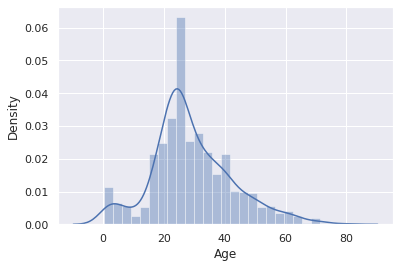

In [10]:
sns.set_theme()
age_plot_data = pd.Series(data['Age'], name="Age")
age_plot = sns.distplot(age_plot_data)

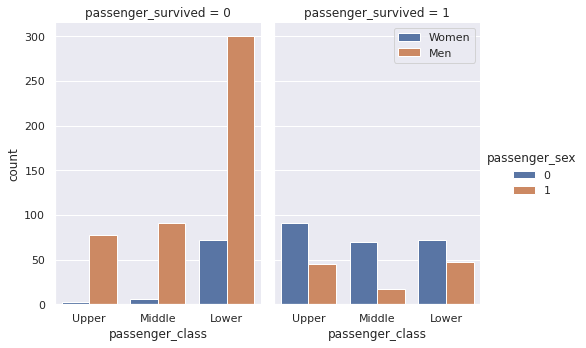

In [ ]:
sns.set_theme()
ax = sns.catplot(x="passenger_class", hue="passenger_sex", col="passenger_survived",data=data, kind="count", height=5, aspect=.7)
ax.set_xticklabels(['Upper', 'Middle', 'Lower'])
plt.legend(['Women', 'Men'])

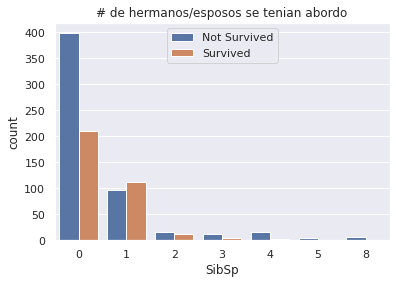

In [ ]:
SibSp_plot = sns.countplot(x=data['SibSp'], data=data, hue='passenger_survived')
SibSp_plot.set_title('# de hermanos/esposos se tenian abordo')
plt.legend(['Not Survived', 'Survived'])

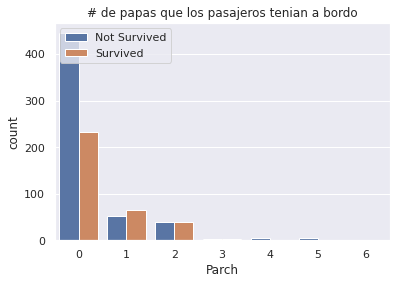

In [ ]:
SibSp_plot = sns.countplot(x=data['Parch'], data=data, hue='passenger_survived')
SibSp_plot.set_title('# de papas/hijos se tenian abordo')
plt.legend(['Not Survived', 'Survived'])

Conclusiones del analisis exploratorio: 

1.   Hubo mas mortalidad de hombres que mujeres.
2.   La major cantidad de muertos son hombres de la clase "Lower".
3.   Mayor mortalidad con la clase baja que la clase alta.
4.   La mortalidad mas baja es de las mujeres en clase alta.
5.   La moratalidad mas alta de los pasajeros que iban solos sin hijos/padres o hermanos/esposos.



# **Modelos de Predicción**

### **Modelo Árbol de decisión (Sklearn)**

In [130]:
def arbol_decision(x,y):
  decision_tree = DecisionTreeClassifier()
  decision_tree.fit(x, y)
  return decision_tree

### **Modelo Support Vector Machine (Sklearn)**

In [157]:
def support_vector_machine(x,y, kernel='linear'):
    supporvectormachine = svm.SVC(kernel=kernel)
    supporvectormachine.fit(x,y)
    return supporvectormachine

### **Modelo Naive Bayes**

In [172]:
def naive_bayes(x,y):
  pass

by_class = data.groupby('passenger_survived')
by_class

### **Modelo Regresión Logistica Binaria**

In [45]:
def regresion_logistica(x,y,epochs, lr, imprimir_cada):
  #placeholder de x 
  placeholder_x = tf.placeholder(tf.float64, [len(x), x.shape[1]], "x")
  #placeholder de y 
  placeholder_y = tf.placeholder(tf.float64, [len(y), 1], "y")
  #Inicio de sesion
  with tf.Session() as session:
    ## variable independiente
    n_independent_vars = placeholder_x.shape[1] + 1
    ## bias 
    bias_feature = tf.ones([x.shape[0], 1], tf.float64)
    ## concatenar al placeholder de x el bias de cada uno 
    placeholder_x = tf.concat([placeholder_x, bias_feature], axis=1)
    ## pesos iniciales, nos da +1  del placeholder de x
    initial_peso = tf.zeros([n_independent_vars, 1], tf.float64)
    #asignacion de peso
    peso = tf.Variable(name="weight", initial_value=initial_peso)
    #Calculo de error
    error_op = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=tf.matmul(placeholder_x, peso),labels=placeholder_y))
    #Calculo de gradientes
    gradients = tf.gradients(error_op, peso)
    #Reajuste de gradiente
    adjustment = tf.scalar_mul(-lr, gradients[0])
    # Correr la sesion
    session.run(tf.global_variables_initializer())
    for epoch in range(1, epochs + 1):
      feed = { placeholder_x: placeholder_x, placeholder_y: placeholder_y }
      out = session.run([peso, error_op], feed)
      error = out[1]
      weights = out[0]

xs = train[['passenger_sex','Age']]
ys = train['passenger_survived'].to_numpy()

regresion_logistica(xs,ys,100, 0.01, 10)

TypeError: ignored

# ***Fase de entrenamiento***

Funcion que nos da el calculo del accuracy,error, precisión, recall, f1-score

In [66]:
## calcular accuracy,error, precisión, recall, f1-score
def score(y_real, y_predictivo):
  metrics = pd.DataFrame()
  error = 0

  for i in range(len(y_real)):
    if y_real[i] != y_predictivo[i]:
      error += 1

  metrics['Accuracy']  = [accuracy_score(y_real, y_predictivo)]
  metrics['Error'] = [error / len(y_real)]
  metrics['Precisión'] = [precision_score(y_real, y_predictivo)]
  metrics['Recall'] = [recall_score(y_real, y_predictivo)]
  metrics['F1-Score'] = [f1_score(y_real, y_predictivo)]

  return metrics

# **Entrenamiento para Modelo Árbol de Decision**


In [135]:
def train_arbol_decision(x,y):
  tree_model = arbol_decision(x, y)
  y_train = tree_model.predict(x)
  metrics = score(y,y_train)
  return metrics



Variables X -> Sexo y Edad

In [145]:
x_arbol = train[['passenger_sex','Age']]
y_arbol = train['passenger_survived'].to_numpy()

x_arbol_validacion = validation[['passenger_sex','Age']]
y_arbol_validacion = validation['passenger_survived'].to_numpy()

print("Datos de Entrenamiento")
print(train_arbol_decision(x_arbol, y_arbol))
print("Datos de Validación")
print(train_arbol_decision(x_arbol_validacion, y_arbol_validacion))


Datos de Entrenamiento
   Accuracy     Error  Precisión    Recall  F1-Score
0  0.825843  0.174157   0.797521  0.720149  0.756863
Datos de Validación
   Accuracy     Error  Precisión    Recall  F1-Score
0  0.861111  0.138889    0.97561  0.677966       0.8



Variables X -> Embarked, Sexo, hermanos/esposos y Edad

In [146]:
x_arbol = train[['Embarked', 'passenger_sex', 'SibSp','Age']]
y_arbol = train['passenger_survived'].to_numpy()

x_arbol_validacion = validation[['Embarked', 'passenger_sex','SibSp', 'Age']]
y_arbol_validacion = validation['passenger_survived'].to_numpy()

print("Datos de Entrenamiento")
print(train_arbol_decision(x_arbol, y_arbol))
print("Datos de Validación")
print(train_arbol_decision(x_arbol_validacion, y_arbol_validacion))


Datos de Entrenamiento
   Accuracy     Error  Precisión    Recall  F1-Score
0  0.891854  0.108146   0.899582  0.802239  0.848126
Datos de Validación
   Accuracy     Error  Precisión    Recall  F1-Score
0  0.958333  0.041667        1.0  0.898305  0.946429



Variables X -> Embarked, Sexo y Edad

In [147]:
x_arbol = train[['Embarked', 'passenger_sex', 'Age']]
y_arbol = train['passenger_survived'].to_numpy()

x_arbol_validacion = validation[['Embarked', 'passenger_sex', 'Age']]
y_arbol_validacion = validation['passenger_survived'].to_numpy()

print("Datos de Entrenamiento")
print(train_arbol_decision(x_arbol, y_arbol))
print("Datos de Validación")
print(train_arbol_decision(x_arbol_validacion, y_arbol_validacion))


Datos de Entrenamiento
   Accuracy     Error  Precisión    Recall  F1-Score
0  0.852528  0.147472   0.855895  0.731343  0.788732
Datos de Validación
   Accuracy     Error  Precisión    Recall  F1-Score
0  0.916667  0.083333   0.960784  0.830508  0.890909



Variables X -> Embarked, Sexo, hermanos/esposos, hijos/papas y Edad

In [148]:
x_arbol = train[['Embarked', 'passenger_sex', 'Parch','SibSp','Age']]
y_arbol = train['passenger_survived'].to_numpy()

x_arbol_validacion = validation[['Embarked', 'passenger_sex','SibSp', 'Age']]
y_arbol_validacion = validation['passenger_survived'].to_numpy()

print("Datos de Entrenamiento")
print(train_arbol_decision(x_arbol, y_arbol))
print("Datos de Validación")
print(train_arbol_decision(x_arbol_validacion, y_arbol_validacion))


Datos de Entrenamiento
   Accuracy     Error  Precisión   Recall  F1-Score
0  0.917135  0.082865   0.940928  0.83209  0.883168
Datos de Validación
   Accuracy     Error  Precisión    Recall  F1-Score
0  0.958333  0.041667        1.0  0.898305  0.946429


# **Entrenamiento para Support Vector Machine**


In [149]:
def train_support_vector_machine(x,y):
  svm_model = support_vector_machine(x, y)
  y_train = svm_model.predict(x)
  metrics = score(y,y_train)
  return metrics

Variables X -> Sexo y Edad

In [158]:
x_suppor_vector_machine = train[['passenger_sex','Age']]
y_suppor_vector_machine = train['passenger_survived'].to_numpy()

x_suppor_vector_machine_validacion = validation[['passenger_sex','Age']]
y_suppor_vector_machine_validacion = validation['passenger_survived'].to_numpy()

print("Datos de Entrenamiento")
print(train_support_vector_machine(x_suppor_vector_machine, y_suppor_vector_machine))
print("Datos de Validación")
print(train_support_vector_machine(x_suppor_vector_machine_validacion, y_suppor_vector_machine_validacion))


Datos de Entrenamiento
   Accuracy     Error  Precisión    Recall  F1-Score
0  0.787921  0.212079   0.738776  0.675373  0.705653
Datos de Validación
   Accuracy     Error  Precisión    Recall  F1-Score
0  0.743056  0.256944   0.703704  0.644068  0.672566



Variables X -> Embarked, Sexo, hermanos/esposos y Edad

In [159]:
x_suppor_vector_machine = train[['Embarked', 'passenger_sex', 'SibSp','Age']]
y_suppor_vector_machine = train['passenger_survived'].to_numpy()

x_suppor_vector_machine_validacion = validation[['Embarked', 'passenger_sex', 'SibSp','Age']]
y_suppor_vector_machine_validacion = validation['passenger_survived'].to_numpy()

print("Datos de Entrenamiento")
print(train_support_vector_machine(x_suppor_vector_machine, y_suppor_vector_machine))
print("Datos de Validación")
print(train_support_vector_machine(x_suppor_vector_machine_validacion, y_suppor_vector_machine_validacion))

Datos de Entrenamiento
   Accuracy     Error  Precisión    Recall  F1-Score
0  0.787921  0.212079   0.738776  0.675373  0.705653
Datos de Validación
   Accuracy     Error  Precisión    Recall  F1-Score
0  0.743056  0.256944   0.703704  0.644068  0.672566


Variables X -> Embarked, Sexo, y Edad

In [161]:
x_suppor_vector_machine = train[['Embarked', 'passenger_sex', 'Age']]
y_suppor_vector_machine = train['passenger_survived'].to_numpy()

x_suppor_vector_machine_validacion = validation[['Embarked', 'passenger_sex', 'Age']]
y_suppor_vector_machine_validacion = validation['passenger_survived'].to_numpy()

print("Datos de Entrenamiento")
print(train_support_vector_machine(x_suppor_vector_machine, y_suppor_vector_machine))
print("Datos de Validación")
print(train_support_vector_machine(x_suppor_vector_machine_validacion, y_suppor_vector_machine_validacion))

Datos de Entrenamiento
   Accuracy     Error  Precisión    Recall  F1-Score
0  0.787921  0.212079   0.738776  0.675373  0.705653
Datos de Validación
   Accuracy     Error  Precisión    Recall  F1-Score
0  0.743056  0.256944   0.703704  0.644068  0.672566


Variables X -> Embarked, Sexo, hermanos/esposos, papas/hijos, Fare, passanger_class y Edad

In [166]:
x_suppor_vector_machine = train[['Embarked', 'passenger_sex', 'SibSp','Age','Parch', 'Fare', 'passenger_class']]
y_suppor_vector_machine = train['passenger_survived'].to_numpy()

x_suppor_vector_machine_validacion = validation[['Embarked', 'passenger_sex', 'SibSp','Age','Parch', 'Fare', 'passenger_class']]
y_suppor_vector_machine_validacion = validation['passenger_survived'].to_numpy()

print("Datos de Entrenamiento")
print(train_support_vector_machine(x_suppor_vector_machine, y_suppor_vector_machine))
print("Datos de Validación")
print(train_support_vector_machine(x_suppor_vector_machine_validacion, y_suppor_vector_machine_validacion))

Datos de Entrenamiento
   Accuracy     Error  Precisión    Recall  F1-Score
0  0.787921  0.212079   0.738776  0.675373  0.705653
Datos de Validación
   Accuracy     Error  Precisión   Recall  F1-Score
0  0.854167  0.145833   0.839286  0.79661  0.817391
